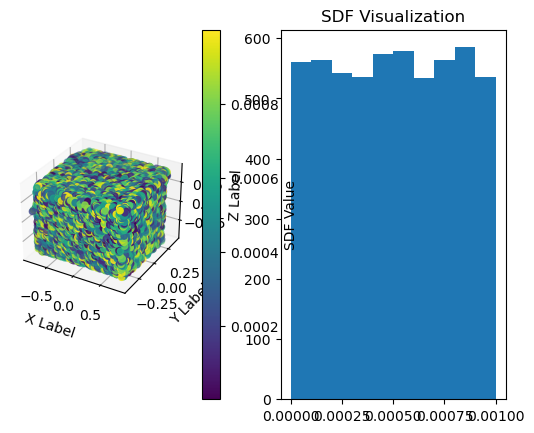

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from mesh_to_sdf import get_surface_point_cloud,scale_to_unit_cube, scale_to_unit_sphere, BadMeshException, sample_sdf_near_surface

def vis_sdf(data, sdf_threshold=0.01):
    # 获取xyz坐标和sdf值
    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]
    sdf_values = data[:, 3]

    threshold = sdf_threshold

    x = x[sdf_values<threshold]
    y = y[sdf_values<threshold]
    z = z[sdf_values<threshold]

    sdf_values = sdf_values[sdf_values<threshold]

    # 创建一个新的3D图形
    fig = plt.figure()
    ax = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)
    ax2.hist(sdf_values)

    # 使用SDF值作为颜色映射
    scatter = ax.scatter(x, y, z, c=sdf_values, cmap='viridis')
    plt.colorbar(scatter, ax=ax, label='SDF Value')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.title('SDF Visualization')
    plt.show()

raw = np.load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/1b0432fd7b56f7e219fb4103277a6b93_scene0166_01_ins_7.npz")
data = raw['pos']
sdf_threshold=0.001
vis_sdf(data,sdf_threshold)

In [2]:
def get_mesh(sdf_path):
    mesh_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus"
    import os
    instance_name = os.path.basename(sdf_path).split(".")[0]
    class_id = sdf_path.split("/")[-2]
    mesh_path = os.path.join(mesh_root,class_id,instance_name,"model_canonical_manifoldplus.obj")
    return mesh_path

get_mesh("/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origpreprocess/Reconstructions/2000/Meshes_train/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7.ply")

'/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7/model_canonical_manifoldplus.obj'

In [ ]:
"""

比较DeepSDF原版生成到sdf采样数据和真实mesh的尺度差距

"""

import plotly.graph_objs as go
from plyfile import PlyData
import numpy as np

def get_mesh(sdf_path):
    mesh_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus"
    import os
    instance_name = os.path.basename(sdf_path).split(".")[0]
    class_id = sdf_path.split("/")[-2]
    mesh_path = os.path.join(mesh_root,class_id,instance_name,"model_canonical_manifoldplus.obj")
    return mesh_path

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/data/SdfSamples/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7.npz"
mesh_path =  "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origpreprocess/Reconstructions/2000/Meshes_train/canonical_mesh_manifoldplus/04256520/6ebad671c5ccfee94c02d21d2fa4d397_scene0601_00_ins_7.ply"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/556166f38429cdfe29bdd38dd4a1a461_scene0499_00_ins_13.npz"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/556166f38429cdfe29bdd38dd4a1a461_scene0499_00_ins_13/model_canonical_manifoldplus.obj"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples_new/sofas_dit/Reconstructions/2000/Meshes_train/canonical_mesh_manifoldplus/04256520/556166f38429cdfe29bdd38dd4a1a461_scene0499_00_ins_13.ply"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/ShapeNet_manifoldplus/04379243/10139657dfa9afe0c3bd24f986301745.npz"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ShapeNet_manifoldplus/04379243/10139657dfa9afe0c3bd24f986301745.obj"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz"
mesh_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2/model_canonical_manifoldplus.obj"

RESCALE=True

def mesh_load(mesh_path):
    # 从文件加载网格数据
    file_suffix = mesh_path.split(".")[-1]
    if file_suffix == "obj":
        with open(mesh_path, 'r') as file:
            lines = file.readlines()

        vertices = []
        faces = []

        for line in lines:
            if line.startswith('v '):
                vertex = line.split()[1:]
                vertices.append([float(vertex[0]), float(vertex[1]), float(vertex[2])])
            elif line.startswith('f '):
                face = line.split()[1:]
                face_indices = [int(idx.split('/')[0]) - 1 for idx in face]
                faces.append(face_indices)

        mesh = go.Mesh3d(x=[v[0] for v in vertices], y=[v[1] for v in vertices], z=[v[2] for v in vertices],
                        i=[f[0] for f in faces], j=[f[1] for f in faces], k=[f[2] for f in faces], name="gt mesh")
        return mesh

    elif file_suffix == "ply":
        from plyfile import PlyData

        # 从PLY文件加载网格数据
        plydata = PlyData.read(mesh_path)

        # 提取顶点坐标
        vertices = np.array([list(vertex) for vertex in plydata['vertex'].data])

        # 提取面数据
        faces = np.array(plydata['face'].data['vertex_indices'])
        faces = np.array([list(row) for row in faces])

        # 创建网格图形对象
        mesh = go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], i=faces[:, 0], j=faces[:, 1], k=faces[:, 2], name="recon mesh")
    
        return mesh

mesh = mesh_load(mesh_path)

#加载SDF值
raw = np.load(sdf_path)
data = raw['pos']
print(raw['scale_mesh2sdf'])
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
sdf_values = data[:, 3]

threshold = 0.0005


if not RESCALE:
    x = x[sdf_values<threshold]
    y = y[sdf_values<threshold]
    z = z[sdf_values<threshold]
else:
    x = x[sdf_values<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
    y = y[sdf_values<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
    z = z[sdf_values<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]

trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="sdf samples")
layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

fig = go.Figure(data=[trace,mesh], layout=layout)
fig.show()

In [10]:
import numpy as np

raw = np.load("/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepSDF/data/SdfSamples/canonical_mesh_manifoldplus/04256520/7c9e1876b1643e93f9377e1922a21892_scene0329_01_ins_4.npz")
print(raw.files)
print(raw['scale_mesh2sdf'])
print(raw['translation_mesh2sdf'])
"".join([chr(n) for n in raw['mesh_filename']])


['pos', 'neg', 'translation_mesh2sdf', 'scale_mesh2sdf', 'mesh_filename']
[0.877599]
[-0.00372851  0.029984   -0.01235551]


'DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/7c9e1876b1643e93f9377e1922a21892_scene0329_01_ins_4/model_canonical_manifoldplus.obj'

# 清洗python版本和DeepSDF版本数据

In [1]:
import os
import numpy as np
import pdb
import plotly.graph_objs as go

def mesh_load(mesh_path, opacity=0.5, scale=None, translation=None):
    # 从文件加载网格数据
    file_suffix = mesh_path.split(".")[-1]
    if file_suffix == "obj":
        with open(mesh_path, 'r') as file:
            lines = file.readlines()

        vertices = []
        faces = []

        for line in lines:
            if line.startswith('v '):
                vertex = line.split()[1:]
                vertices.append([float(vertex[0]), float(vertex[1]), float(vertex[2])])
            elif line.startswith('f '):
                face = line.split()[1:]
                face_indices = [int(idx.split('/')[0]) - 1 for idx in face]
                faces.append(face_indices)

        mesh = go.Mesh3d(x=[v[0] for v in vertices], y=[v[1] for v in vertices], z=[v[2] for v in vertices],
                        i=[f[0] for f in faces], j=[f[1] for f in faces], k=[f[2] for f in faces], name="gt mesh",opacity=opacity)
        return mesh

    elif file_suffix == "ply":
        from plyfile import PlyData

        # 从PLY文件加载网格数据
        plydata = PlyData.read(mesh_path)

        # 提取顶点坐标
        vertices = np.array([list(vertex) for vertex in plydata['vertex'].data])

        # 提取面数据
        faces = np.array(plydata['face'].data['vertex_indices'])
        faces = np.array([list(row) for row in faces])

        # 创建网格图形对象
        mesh = go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], i=faces[:, 0], j=faces[:, 1], k=faces[:, 2], name="recon mesh",opacity=0.5)
    
        return mesh

# 指定文件夹路径
sdf_folder_path = '/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ScanARCW_new/ScanARCW/sdf_samples/04256520'
mg_sdf_folder_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ScanARCW/sdf_samples/04256520"

mesh_root = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/DATA/ScanARCW_new/ScanARCW/canonical_mesh/04256520"

# 获取文件夹中的所有文件及其大小
files_with_size = [(file, os.path.getsize(os.path.join(sdf_folder_path, file))) for file in os.listdir(sdf_folder_path) if os.path.isfile(os.path.join(sdf_folder_path, file))]

# 按照文件大小排序
sorted_files = sorted(files_with_size, key=lambda x: x[1])

small_list = dict([])
big_list = dict([])

threshold = 5275883

# 打印排序后的文件及其大小
for file, size in sorted_files:
    print(f"文件：{file}, 大小：{size} 字节")
    if size < threshold:
        small_list[file] = size
    else:
        big_list[file] = size

small_list

文件：4f17918826b64fc8d5cba62773b8025b_scene0239_02_ins_3.npz, 大小：1114635 字节
文件：7ac7a4f53a89ecb48f966131432ef871_scene0694_00_ins_1.npz, 大小：1368315 字节
文件：e9e5da988215f06513292732a7b1ed9a_scene0593_01_ins_5.npz, 大小：2166603 字节
文件：e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_2.npz, 大小：2517995 字节
文件：e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_1.npz, 大小：2605115 字节
文件：e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz, 大小：4040587 字节
文件：621dab02dc0ac842e7891ff53b0e70d_scene0239_02_ins_1.npz, 大小：4215226 字节
文件：acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_2.npz, 大小：4457691 字节
文件：acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_3.npz, 大小：4543691 字节
文件：3af6ec685a6aa14e2f99eeb199d54554_scene0299_00_ins_4.npz, 大小：4641659 字节
文件：ce049a259cc2e624d5446ca68a7e06a3_scene0603_00_ins_2.npz, 大小：5037819 字节
文件：923e063599dc9ac7679edf1f9e4dc0a7_scene0024_01_ins_2.npz, 大小：5097931 字节
文件：27c82d27a4d38e6f41b160b9adc112fd_scene0423_01_ins_2.npz, 大小：5275883 字节
文件：27c82d27a4d38e6f41b160b9adc112fd_sce

{'4f17918826b64fc8d5cba62773b8025b_scene0239_02_ins_3.npz': 1114635,
 '7ac7a4f53a89ecb48f966131432ef871_scene0694_00_ins_1.npz': 1368315,
 'e9e5da988215f06513292732a7b1ed9a_scene0593_01_ins_5.npz': 2166603,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_2.npz': 2517995,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_1.npz': 2605115,
 'e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz': 4040587,
 '621dab02dc0ac842e7891ff53b0e70d_scene0239_02_ins_1.npz': 4215226,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_2.npz': 4457691,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_3.npz': 4543691,
 '3af6ec685a6aa14e2f99eeb199d54554_scene0299_00_ins_4.npz': 4641659,
 'ce049a259cc2e624d5446ca68a7e06a3_scene0603_00_ins_2.npz': 5037819,
 '923e063599dc9ac7679edf1f9e4dc0a7_scene0024_01_ins_2.npz': 5097931}

In [3]:
len(small_list)
small_list

{'4f17918826b64fc8d5cba62773b8025b_scene0239_02_ins_3.npz': 1114635,
 '7ac7a4f53a89ecb48f966131432ef871_scene0694_00_ins_1.npz': 1368315,
 'e9e5da988215f06513292732a7b1ed9a_scene0593_01_ins_5.npz': 2166603,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_2.npz': 2517995,
 'e9e5da988215f06513292732a7b1ed9a_scene0461_00_ins_1.npz': 2605115,
 'e4066cefe0230cc7b2ccd937df5da28f_scene0385_00_ins_2.npz': 4040587,
 '621dab02dc0ac842e7891ff53b0e70d_scene0239_02_ins_1.npz': 4215226,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_2.npz': 4457691,
 'acaf2b81121c78f6acacae5381781ae4_scene0269_01_ins_3.npz': 4543691,
 '3af6ec685a6aa14e2f99eeb199d54554_scene0299_00_ins_4.npz': 4641659,
 'ce049a259cc2e624d5446ca68a7e06a3_scene0603_00_ins_2.npz': 5037819,
 '923e063599dc9ac7679edf1f9e4dc0a7_scene0024_01_ins_2.npz': 5097931}

In [7]:
# np.savetxt("big_list.txt",list(big_list.keys()))
# np.savetxt("small_list.txt", list(small_list.keys()))

filename = "big_list.txt"
# Open the file for writing ('w' mode)
with open(filename, 'w') as file:
    # Write each string to the file with a newline character
    for line in list(big_list.keys()):
        line = line.split(".")[0]
        file.write(f"{line}\n")

filename = "small_list.txt"
# Open the file for writing ('w' mode)
with open(filename, 'w') as file:
    # Write each string to the file with a newline character
    for line in list(small_list.keys()):
        line = line.split(".")[0]
        file.write(f"{line}\n")

In [71]:
list(big_list.keys())

['27c82d27a4d38e6f41b160b9adc112fd_scene0423_01_ins_2.npz',
 '27c82d27a4d38e6f41b160b9adc112fd_scene0192_01_ins_4.npz',
 '27c82d27a4d38e6f41b160b9adc112fd_scene0192_01_ins_2.npz',
 '27c82d27a4d38e6f41b160b9adc112fd_scene0192_01_ins_3.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0529_01_ins_5.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0288_02_ins_3.npz',
 '8458d6939967ac1bbc7a6acbd8f058b_scene0050_02_ins_4.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0623_00_ins_2.npz',
 'e596ed19966b698c10edd100dffd8d85_scene0540_00_ins_2.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0329_02_ins_7.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0623_01_ins_8.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0329_02_ins_6.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0288_01_ins_3.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0008_00_ins_13.npz',
 'fa1e1a91e66faf411de55fee5ac2c5c2_scene0419_00_ins_10.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scene0025_00_ins_4.npz',
 '8659f0f422096e3d26f6c8b5b75f0ee9_scen

可视化检查小instance

In [ ]:
threshold = 0.005

for file in list(small_list.keys())[:5]:

    file = list(small_list.keys())[-1]

    with np.load(os.path.join(sdf_folder_path,file)) as raw:
        # data = raw['pos']
        data = np.vstack((raw['pos'],raw['neg']))
        print(raw['scale_mesh2sdf'])
        x = data[:, 0]
        y = data[:, 1]
        z = data[:, 2]
        sdf_values = data[:, 3]
        
        x = x[np.abs(sdf_values)<threshold]
        y = y[np.abs(sdf_values)<threshold]
        z = z[np.abs(sdf_values)<threshold]

        # x = x/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
        # y = y/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
        # z = z/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]
        trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

    with np.load(os.path.join(mg_sdf_folder_path,file)) as raw:
        data = np.vstack((raw['pos'],raw['neg']))
        x = data[:, 0]
        y = data[:, 1]
        z = data[:, 2]
        sdf_values = data[:, 3]
        threshold  = 0.005
        mark = np.abs(sdf_values)<threshold
        x = x[mark]
        y = y[mark]
        z = z[mark]

        indices = np.random.choice(x.shape[0], size=5000, replace=True)
        x = x[indices]
        y = y[indices]
        z = z[indices]
        
        trace2 = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="mg sdf samples")

    mesh_path = os.path.join(mesh_root,file.split(".")[0],"model_canonical_manifoldplus.obj") 
    mesh = mesh_load(mesh_path)

    layout = go.Layout(scene=dict(
            aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),)
    
    mesh.opacity = 0.5

    fig = go.Figure(data=[trace2,trace], layout=layout)
    fig.show()
    break
    # pdb.set_trace()

可视化检查大instance差异

In [ ]:
threshold = 0.005

for file in list(big_list.keys()):

    file = list(big_list.keys())[1]

    with np.load(os.path.join(sdf_folder_path,file)) as raw:
        # data = raw['pos']
        data0 = np.vstack((raw['pos'],raw['neg']))
        print(raw['scale_mesh2sdf'])
        x = data0[:, 0]
        y = data0[:, 1]
        z = data0[:, 2]
        sdf_values = data0[:, 3]
        
        x = x[np.abs(sdf_values)<threshold]
        y = y[np.abs(sdf_values)<threshold]
        z = z[np.abs(sdf_values)<threshold]

        # x = x/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
        # y = y/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
        # z = z/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]
        trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

    with np.load(os.path.join(mg_sdf_folder_path,file)) as raw:
        data1 = np.vstack((raw['pos'],raw['neg']))
        x = data1[:, 0]
        y = data1[:, 1]
        z = data1[:, 2]
        sdf_values1 = data1[:, 3]
        threshold  = 0.005
        mark = np.abs(sdf_values1)<threshold
        x = x[mark]
        y = y[mark]
        z = z[mark]

        indices = np.random.choice(x.shape[0], size=5000, replace=True)
        x = x[indices]
        y = y[indices]
        z = z[indices]
        
        trace2 = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="mg sdf samples")

    mesh_path = os.path.join(mesh_root,file.split(".")[0],"model_canonical_manifoldplus.obj") 
    mesh = mesh_load(mesh_path)

    layout = go.Layout(scene=dict(
            aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),)
    
    mesh.opacity = 0.5

    fig = go.Figure(data=[trace2,trace], layout=layout)
    fig.show()
    break
    # pdb.set_trace()

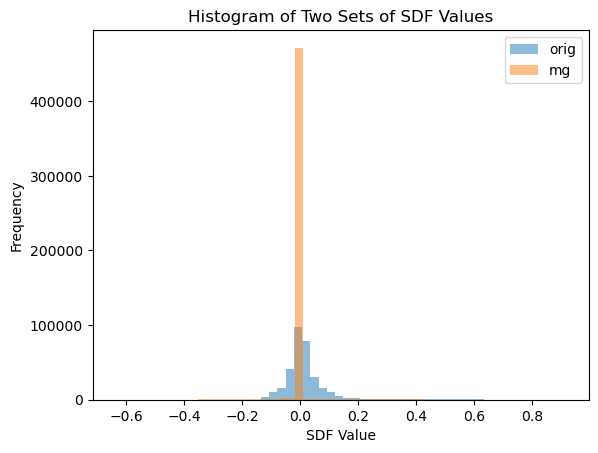

In [10]:
import matplotlib.pyplot as plt
plt.hist(sdf_values, bins=50, alpha=0.5, label='orig')
plt.hist(sdf_values1, bins=50, alpha=0.5, label='mg')
plt.title("Histogram of Two Sets of SDF Values")
plt.xlabel("SDF Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 对比重建和gt mesh结果

In [ ]:
mesh_path_recon = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/examples/sofas_dit_manifoldplus_scanarcw_origprep_all_pretrained/Reconstructions/1000/Meshes_train/canonical_mesh_manifoldplus/04256520/1c4bfbfceb9e579c708f430fbe4ae8ff_scene0515_01_ins_1.ply"
mesh_gt_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DATA/ScanARCW/canonical_mesh_manifoldplus/04256520/1c4bfbfceb9e579c708f430fbe4ae8ff_scene0515_01_ins_1/model_canonical_manifoldplus.obj"

sdf_path = "/home/wiss/lhao/storage/user/hjp/ws_dditnach/DeepImplicitTemplates/data/SdfSamples/canonical_mesh_manifoldplus/04256520/1c4bfbfceb9e579c708f430fbe4ae8ff_scene0515_01_ins_1.npz"

raw = np.load(sdf_path)
scale = raw['scale_mesh2sdf'] 
translation = raw['translation_mesh2sdf']

mesh_recon = mesh_load(mesh_path_recon)
mesh_gt = mesh_load(mesh_gt_path)

RESCALE=True

threshold = 0.005
with np.load(os.path.join(sdf_path)) as raw:
        # data = raw['pos']
        data0 = np.vstack((raw['pos'],raw['neg']))
        print(raw['scale_mesh2sdf'])
        x = data0[:, 0]
        y = data0[:, 1]
        z = data0[:, 2]
        sdf_values = data0[:, 3]
        
        if not RESCALE:
                x = x[np.abs(sdf_values)<threshold]
                y = y[np.abs(sdf_values)<threshold]
                z = z[np.abs(sdf_values)<threshold]
        else:
                x = x[np.abs(sdf_values)<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
                y = y[np.abs(sdf_values)<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
                z = z[np.abs(sdf_values)<threshold]/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]

        # x = x/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][0]
        # y = y/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][1]
        # z = z/raw['scale_mesh2sdf'] - raw['translation_mesh2sdf'][2]
        trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

fig = go.Figure(data=[
        mesh_recon,
        mesh_gt,
        trace], layout=layout)
fig.show()

# Vis GenSDF

In [21]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

In [22]:
raw = pd.read_csv("/home/wiss/lhao/storage/user/hjp/ws_dditnach/Diffusion-SDF/data/grid_data/acronym/Couch/37cfcafe606611d81246538126da07a8/grid_gt.csv")
data = np.array(raw)
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

In [23]:
trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2), name="origprep sdf samples")

layout = go.Layout(scene=dict(
        aspectmode='data',  # Set the aspect ratio to 'cube' for equal scales
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),)

# fig = go.Figure(data=[trace], layout=layout)
# fig.show()

(array([2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0.,    0., 2500.,
           0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,    0.,
        2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,
           0.,    0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,
           0., 4900., 4900.,    0., 7400.,    0., 4900.,    0., 4900.,
           0., 7400.,    0., 4900., 4900.,    0., 7400.,    0., 4900.,
           0., 4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,
           0., 4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0.,
        7400.,    0., 4900., 4900.,    0., 7400.,    0., 4900.,    0.,
        4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,    0.,
        4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0., 7400.,
      

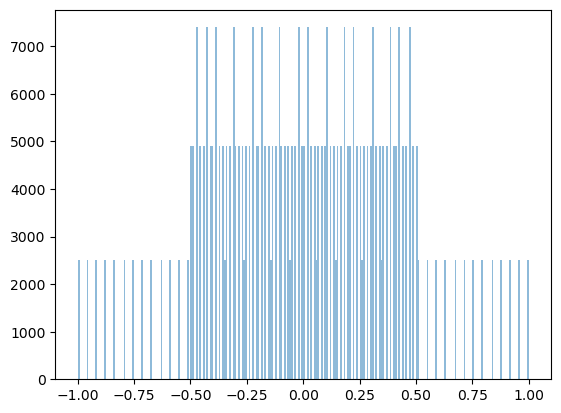

In [24]:
import matplotlib.pyplot as plt
plt.hist(x, bins=256, alpha=0.5, label='orig')

(array([2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0.,    0., 2500.,
           0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,    0.,
        2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,
           0.,    0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,
           0., 4900., 4900.,    0., 7400.,    0., 4900.,    0., 4900.,
           0., 7400.,    0., 4899., 4900.,    0., 7400.,    0., 4900.,
           0., 4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,
           0., 4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0.,
        7400.,    0., 4900., 4900.,    0., 7400.,    0., 4900.,    0.,
        4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,    0.,
        4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0., 7400.,
      

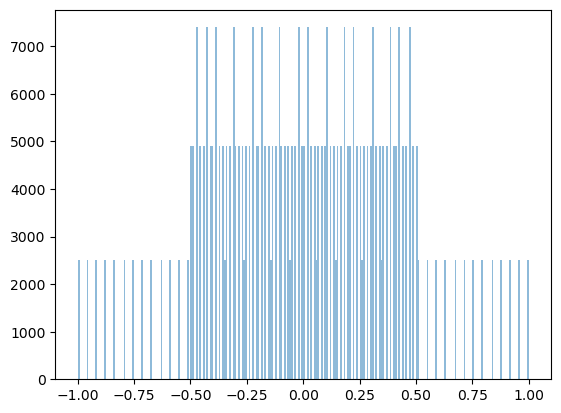

In [25]:
plt.hist(y, bins=256, alpha=0.5, label='orig')

(array([2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0.,    0., 2500.,
           0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,    0.,
        2500.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,    0.,
           0.,    0.,    0., 2500.,    0.,    0.,    0.,    0., 2500.,
           0., 4900., 4900.,    0., 7400.,    0., 4900.,    0., 4900.,
           0., 7400.,    0., 4900., 4900.,    0., 7400.,    0., 4900.,
           0., 4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,
           0., 4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0.,
        7400.,    0., 4900., 4900.,    0., 7400.,    0., 4900.,    0.,
        4900., 2500., 4900.,    0., 4900.,    0., 7400., 4900.,    0.,
        4900.,    0., 4900., 2500., 4900.,    0., 4900.,    0., 7400.,
      

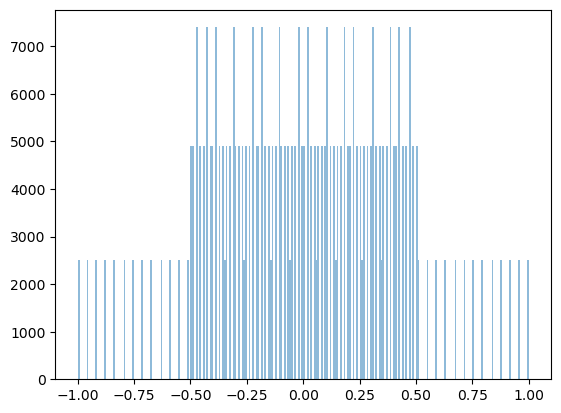

In [26]:
plt.hist(z, bins=256, alpha=0.5, label='orig')

In [27]:
data.shape
np.savetxt("./grid.csv",data[:,:3],delimiter=",")

In [19]:
np.savetxt

<function numpy.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)>